In [12]:
from pathlib import Path
import os
import numpy as np
import librosa 
import librosa.display
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

data_dir = Path(os.getcwd()).parent / 'data'

def standardization(x_wav):
    return (x_wav - x_wav.mean()) / (x_wav.std() + 1e-12)

def open_audio(audio_path):

    audio, sr = librosa.load(audio_path)
    audio = standardization(audio)
    
    return audio, sr

def to_db(spectrogram, power_spectr = False, min_db = -80):
    scale = 10 if power_spectr else 20
    spec_max = np.max(spectrogram)
    spec_db = np.clip(scale * np.log10(spectrogram / spec_max + 1e-12), a_min=min_db, a_max=0)
    return spec_db

flute_path = data_dir / 'flute_a4.wav'
cymbal_path = data_dir / 'cymbal.wav'
snare_path =  data_dir / 'snare.wav'
violin_path = data_dir / 'violin_a4.wav'

x_flute, sr = open_audio(flute_path)
x_cymbal, _ = open_audio(cymbal_path)
x_snare, _ = open_audio(snare_path)
x_violin, _ = open_audio(violin_path)

In [43]:
N = 256
T = 1/sr

time_max = N / sr * 1000 # [ms]
time = np.linspace(0, time_max, num=N)
freq = fftfreq(N, T)[1:N//2]

samp_fin_flute = 100000
samp_in_flute = samp_fin_flute - N
samp_fin_cymb = 15000
samp_in_cymb = samp_fin_cymb - N

x_flute_fft = np.abs(fft(x_flute[samp_in_flute:samp_fin_flute]))
x_flute_fft = 2.0/N * x_flute_fft[1:N//2]

x_cymb_fft = np.abs(fft(x_cymbal[samp_in_cymb:samp_fin_cymb]))
x_cymb_fft = 2.0/N * x_cymb_fft[1:N//2]


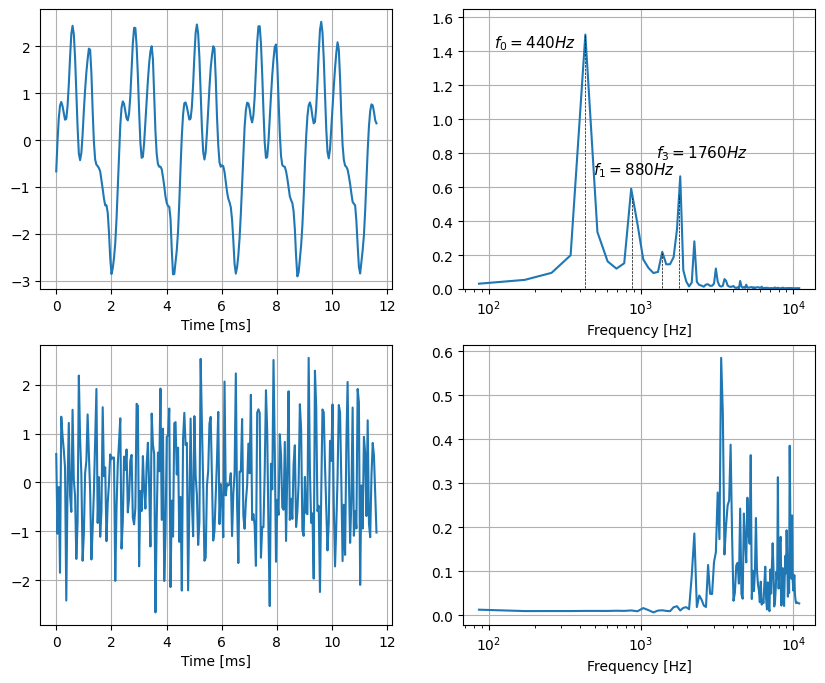

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax[0,0].plot(time, x_flute[samp_in_flute:samp_fin_flute])
ax[0,0].set_xlabel('Time [ms]')
ax[0,0].grid()

ax[0,1].semilogx(freq, x_flute_fft)
ax[0,1].vlines(428.31, ymin=np.min(x_flute_fft), ymax=np.max(x_flute_fft), linewidth=0.5, color='black', linestyle='--')
ax[0,1].annotate(r'$f_0=440Hz$', ha='center',va='center', xy = (200, 1.45), fontsize=11)
ax[0,1].vlines(435*2, ymin=np.min(x_flute_fft), ymax=np.max(x_flute_fft)/2.8, linewidth=0.5, color='black', linestyle='--')
ax[0,1].annotate(r'$f_1=880Hz$', ha='center',va='center', xy = (900, 0.7), fontsize=11)
ax[0,1].vlines(460*3, ymin=np.min(x_flute_fft), ymax=np.max(x_flute_fft)/7, linewidth=0.5, color='black', linestyle='--')
ax[0,1].annotate(r'$f_3=1760Hz$', ha='center',va='center', xy = (2500, 0.8), fontsize=11)
ax[0,1].vlines(444*4, ymin=np.min(x_flute_fft), ymax=np.max(x_flute_fft)/2.7, linewidth=0.5, color='black', linestyle='--')
ax[0,1].set_xlabel('Frequency [Hz]')
ax[0,1].set_ylim([0, 1.1 * np.max(x_flute_fft)])
ax[0,1].grid()

ax[1,0].plot(time, x_cymbal[samp_in_cymb:samp_fin_cymb])
ax[1,0].set_xlabel('Time [ms]')
ax[1,0].grid()

ax[1,1].semilogx(freq, x_cymb_fft)
ax[1,1].set_xlabel('Frequency [Hz]')
ax[1,1].grid()


In [15]:
time_max = len(x_snare) / sr * 1000 # [ms]
time_snare = np.linspace(0, time_max, len(x_snare)*5)

time_max = N / sr # [s]
time_violin = np.linspace(0, time_max, len(x_violin))

x_snare_ = np.concatenate((x_snare, np.zeros(len(x_snare)*4)))


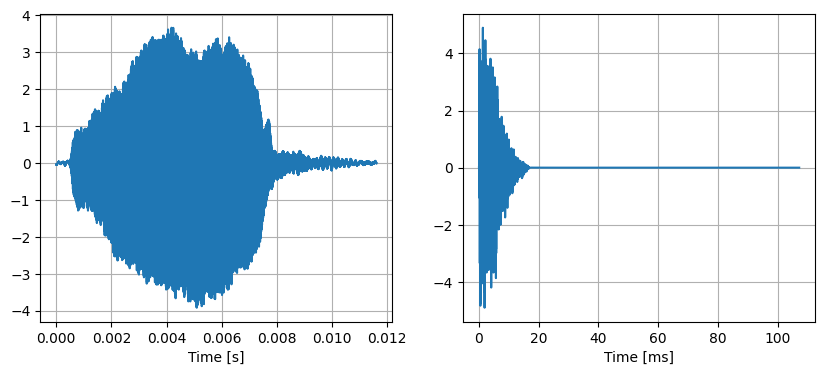

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(time_violin, x_violin)
ax[0].set_xlabel('Time [s]')
ax[0].grid()

ax[1].plot(time_snare, x_snare_)
ax[1].set_xlabel('Time [ms]')
ax[1].grid()




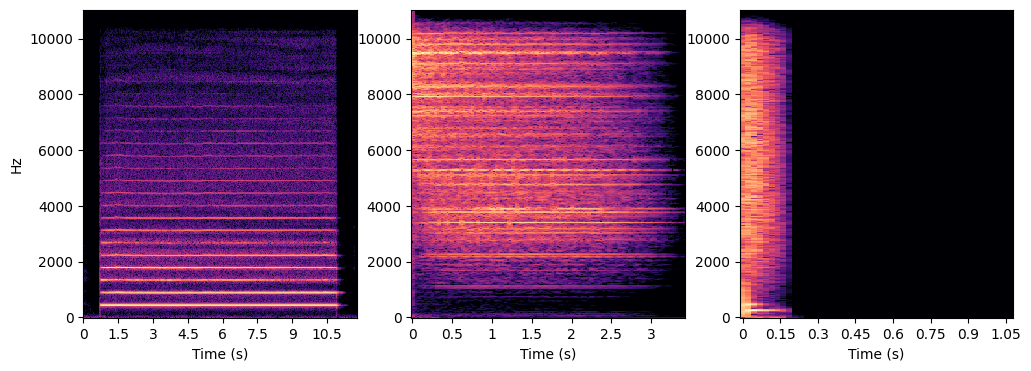

In [29]:
x_snare_stft = to_db(np.abs(librosa.stft(y=x_snare_, n_fft=1024)))
x_flute_stft = to_db(np.abs(librosa.stft(y=x_flute[50000:180000], n_fft=1024)))
x_cymbal_stft = to_db(np.abs(librosa.stft(y=x_cymbal, n_fft=1024)))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
librosa.display.specshow(x_flute_stft, sr=sr, n_fft=1024, x_axis='s', y_axis='hz', ax=ax[0])
librosa.display.specshow(x_cymbal_stft, sr=sr, n_fft=1024, x_axis='s', y_axis='hz', ax=ax[1])
librosa.display.specshow(x_snare_stft, sr=sr, n_fft=1024, x_axis='s', y_axis='hz', ax=ax[2])


In [50]:
import scipy.signal
win = scipy.signal.windows.hann(512)
print(np.sum(win))

255.5
